<a href="https://colab.research.google.com/github/AftabQuant/Deep-Learning/blob/main/Personality_Data_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('personality_dataset.csv')

In [3]:
df.head(3)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert


In [4]:
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [5]:
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean(), inplace=True)
df['Stage_fear'].fillna(df['Stage_fear'].mode(), inplace=True)
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(), inplace=True)
df['Going_outside'].fillna(df['Going_outside'].mean(), inplace=True)

In [6]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,73
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [7]:
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode(), inplace=True)
df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean(), inplace=True)
df['Post_frequency'].fillna(df['Post_frequency'].mode(), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [9]:
df['Post_frequency'].bfill(inplace=True)
df['Stage_fear'].bfill(inplace=True)
df['Drained_after_socializing'].bfill(inplace=True)

In [10]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.557586
std,3.441180,2.872608,2.221597,4.232340,2.921379
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

In [13]:
df.head(4)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0


In [14]:
x = df.iloc[: , :-1]
y = df['Personality']

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [16]:
x.shape

(2900, 7)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
import tensorflow

In [19]:
from keras.layers import Dense
from keras.models import Sequential

In [20]:
ann = Sequential()

In [21]:
ann.add(Dense(units=5, activation='relu'))
ann.add(Dense(units=4, activation='relu'))
ann.add(Dense(units=3, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

In [22]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
ann.fit(x_train,  y_train, epochs=50, batch_size=32)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5804 - loss: 0.6365
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8472 - loss: 0.4908
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9134 - loss: 0.4440
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9279 - loss: 0.4277
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9319 - loss: 0.4093
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9198 - loss: 0.4118
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9221 - loss: 0.3922
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9235 - loss: 0.3828
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9343 - loss: 0.3584
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9324 - loss: 0.3446
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9319 - loss: 0.3479
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9281 

In [24]:
from sklearn.metrics import accuracy_score

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100, 3))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 92.759


In [25]:
x_pred = ann.predict(x_train)
x_pred = (x_pred > 0.5)
accuracy = accuracy_score(y_train, x_pred)
print("Accuracy:", round(accuracy*100, 3))

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.534


## **Regularization Technique & EarlyStopping**

In [38]:
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping

In [39]:
anN = Sequential()

In [40]:
anN.add(Dense(units=5, activation='relu', kernel_regularizer= l2(0.01) ))
anN.add(Dense(units=4, activation='relu', kernel_regularizer= l2(0.01)))
anN.add(Dense(units=3, activation='relu', kernel_regularizer= l2(0.01)))
anN.add(Dense(units=1, activation='sigmoid'))

In [42]:
anN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
anN.fit(x_train, y_train, epochs=50, batch_size=100, callbacks=EarlyStopping(), validation_data=(x_test, y_test))

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9261 - loss: 0.3015 - val_accuracy: 0.9293 - val_loss: 0.2962
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9322 - loss: 0.2847 - val_accuracy: 0.9293 - val_loss: 0.2960
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9444 - loss: 0.2632 - val_accuracy: 0.9293 - val_loss: 0.2959
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9407 - loss: 0.2688 - val_accuracy: 0.9293 - val_loss: 0.2958
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9396 - loss: 0.2703 - val_accuracy: 0.9293 - val_loss: 0.2956
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9392 - loss: 0.2678 - val_accuracy: 0.9293 - val_loss: 0.2954
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9345 - loss: 0.2789 - val_accuracy: 0.9293 - val_loss: 0.2952
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9380 - loss: 0.2710 - val_accuracy: 0.9293 - val_loss

In [50]:
from sklearn.metrics import accuracy_score

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100, 3))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 92.759


In [51]:
x_pred = ann.predict(x_train)
x_pred = (x_pred > 0.5)
accuracy = accuracy_score(y_train, x_pred)
print("Accuracy:", round(accuracy*100, 3))

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.534


In [52]:
anN.history.history

{'accuracy': [0.9353448152542114,
  0.9353448152542114,
  0.9353448152542114,
  0.9353448152542114,
  0.9353448152542114,
  0.9353448152542114,
  0.9353448152542114,
  0.9353448152542114,
  0.9353448152542114,
  0.9353448152542114],
 'loss': [0.2799171507358551,
  0.27962979674339294,
  0.27933743596076965,
  0.27910420298576355,
  0.27891215682029724,
  0.27879348397254944,
  0.278556764125824,
  0.2784632742404938,
  0.27838271856307983,
  0.27827730774879456],
 'val_accuracy': [0.9293103218078613,
  0.9293103218078613,
  0.9293103218078613,
  0.9293103218078613,
  0.9293103218078613,
  0.9293103218078613,
  0.9293103218078613,
  0.9293103218078613,
  0.9293103218078613,
  0.9293103218078613],
 'val_loss': [0.2961983382701874,
  0.2960031032562256,
  0.29593804478645325,
  0.2958112955093384,
  0.2956063747406006,
  0.2954126298427582,
  0.29524683952331543,
  0.2950473427772522,
  0.29488855600357056,
  0.29490330815315247]}

In [53]:
train_accuracy = anN.history.history['accuracy']
test_accuracy = anN.history.history['val_accuracy']

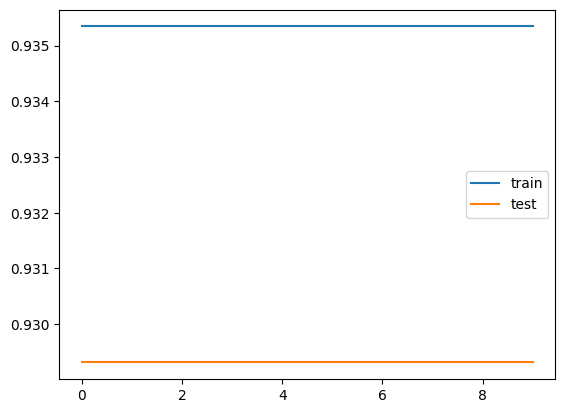

In [54]:
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.legend(['train', 'test'])
plt.show()